# Import Relevant Libraries and Functions

Image Size: 512 x 512
Sucessfully generated average frame
Average frame saved as: Simple_3CH_hel1_Avg_Frame.png
Image Size: 512 x 512
Sucessfully generated average frame
<class 'numpy.ndarray'>
uint8
(512, 512)
0 162


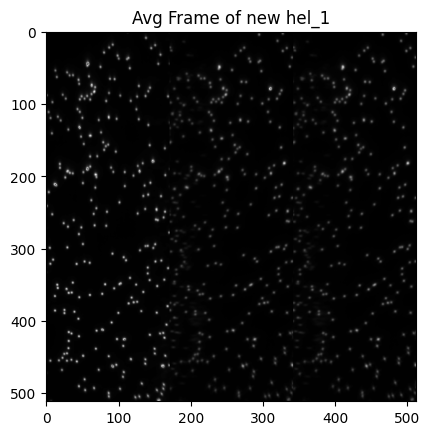

In [1]:
from pathlib import Path
import sys
sys.path.append('../')
from pma_open import *

#My image
hel1_file_path = 'Synthetic Images hel1_new/Simple_3CH_hel1.pma'
avg_image_path = 'Simple_3CH_hel1_Avg_Frame/Simple_3CH_hel1_Avg_Frame.png'
avg_frame_png(hel1_file_path)
avg_frame_data = avg_frame_arr(hel1_file_path)
hel1_avg_image = io.imread(avg_image_path)

# show the image
print(type(hel1_avg_image))
print(hel1_avg_image.dtype)
print(hel1_avg_image.shape)
print(hel1_avg_image.min(), hel1_avg_image.max())
plt.title("Avg Frame of new hel_1")
plt.imshow(hel1_avg_image, cmap="grey")


# Finding Peaks in all 3 Channels

Average CH1 Frame Data- shape: (512, 171)
Average CH1 Frame Data- Type: <class 'numpy.ndarray'>
Average CH1 Frame Data- dType: uint8

Average CH2 Frame Data- shape: (512, 171)
Average CH2 Frame Data- Type: <class 'numpy.ndarray'>
Average CH2 Frame Data- dType: uint8

Average CH3 Frame Data- shape: (512, 170)
Average CH3 Frame Data- Type: <class 'numpy.ndarray'>
Average CH3 Frame Data- dType: uint8


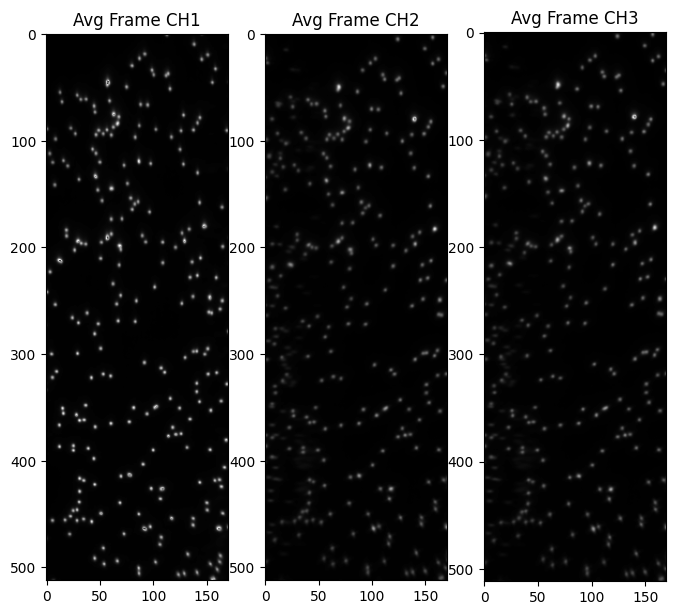

In [2]:
CH1_img_path = "Simple_3CH_hel1_Avg_Frame/hel1_Avg_Frame_CH1.png"
CH2_img_path = "Simple_3CH_hel1_Avg_Frame/hel1_Avg_Frame_CH2.png"
CH3_img_path = "Simple_3CH_hel1_Avg_Frame/hel1_Avg_Frame_CH3.png"
#Chanel arrays
avg_frame_data_CH1 = avg_frame_data[:,:171]
avg_frame_data_CH2 = avg_frame_data[:,171:342]
avg_frame_data_CH3 = avg_frame_data[:,342:513]

# Image.fromarray(avg_frame_data_CH1).save(CH1_img_path)
# Image.fromarray(avg_frame_data_CH2).save(CH2_img_path)
# Image.fromarray(avg_frame_data_CH3).save(CH3_img_path)

print(f"Average CH1 Frame Data- shape: {avg_frame_data_CH1.shape}")
print(f"Average CH1 Frame Data- Type: {type(avg_frame_data_CH1)}")
print(f"Average CH1 Frame Data- dType: {avg_frame_data_CH1.dtype}")

print(f"\nAverage CH2 Frame Data- shape: {avg_frame_data_CH2.shape}")
print(f"Average CH2 Frame Data- Type: {type(avg_frame_data_CH2)}")
print(f"Average CH2 Frame Data- dType: {avg_frame_data_CH2.dtype}")

print(f"\nAverage CH3 Frame Data- shape: {avg_frame_data_CH3.shape}")
print(f"Average CH3 Frame Data- Type: {type(avg_frame_data_CH3)}")
print(f"Average CH3 Frame Data- dType: {avg_frame_data_CH3.dtype}")

fig, ax = plt.subplots(1, 3, figsize=(8, 20))
ax[0].imshow(avg_frame_data_CH1, cmap="gray")
ax[0].set_title("Avg Frame CH1")
ax[1].imshow(avg_frame_data_CH2, cmap="gray")
ax[1].set_title("Avg Frame CH2")
ax[2].imshow(avg_frame_data_CH3, cmap="gray")
ax[2].set_title("Avg Frame CH3")
plt.show()


In [3]:
good_peaks_1,_ = good_peak_finder(CH1_img_path)
good_peaks_2,_ = good_peak_finder(CH2_img_path)
good_peaks_3,_ = good_peak_finder(CH3_img_path)
print(f"Number of CH1 peaks: {len(good_peaks_1)}")
print(f"Number of CH2 peaks: {len(good_peaks_2)}")
print(f"Number of CH3 peaks: {len(good_peaks_3)}\n")
print(f"Good peaks CH1:\n {good_peaks_1[:5]}")
print(f"Good peaks CH2:\n {good_peaks_2[:5]}")
print(f"Good peaks CH3:\n {good_peaks_3[:5]}")


Number of CH1 peaks: 168
Number of CH2 peaks: 161
Number of CH3 peaks: 159

Good peaks CH1:
 [[179 147]
 [ 74  63]
 [211  12]
 [463 160]
 [193 129]]
Good peaks CH2:
 [[182 158]
 [194  68]
 [ 87  77]
 [426 117]
 [ 79  74]]
Good peaks CH3:
 [[182 158]
 [194  68]
 [ 87  77]
 [426 117]
 [ 79  74]]


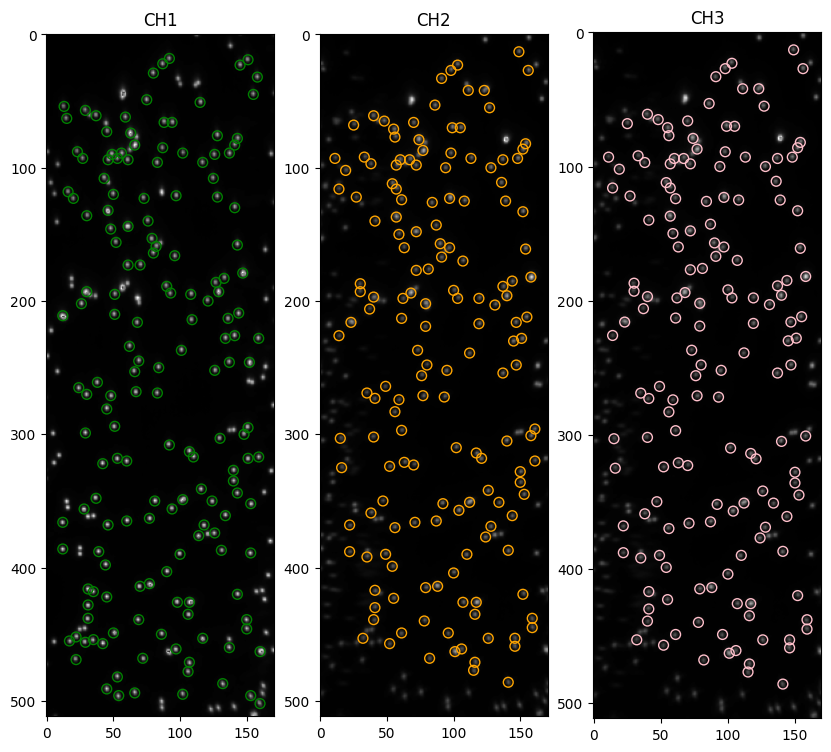

In [4]:
f, axes = plt.subplots(1, 3, figsize=(10, 15))

axes[0].imshow(avg_frame_data_CH1, cmap="gray")
axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='g')
axes[0].set_title('CH1')

axes[1].imshow(avg_frame_data_CH2, cmap="gray")
axes[1].scatter(good_peaks_2[:, 1], good_peaks_2[:, 0], s=50, facecolors='none', edgecolors='orange')
axes[1].set_title('CH2')

#Make this larger
axes[2].imshow(avg_frame_data_CH3, cmap="gray")
axes[2].scatter(good_peaks_3[:, 1], good_peaks_3[:, 0], s=50, facecolors='none', edgecolors='pink')
axes[2].set_title('CH3')
plt.show()

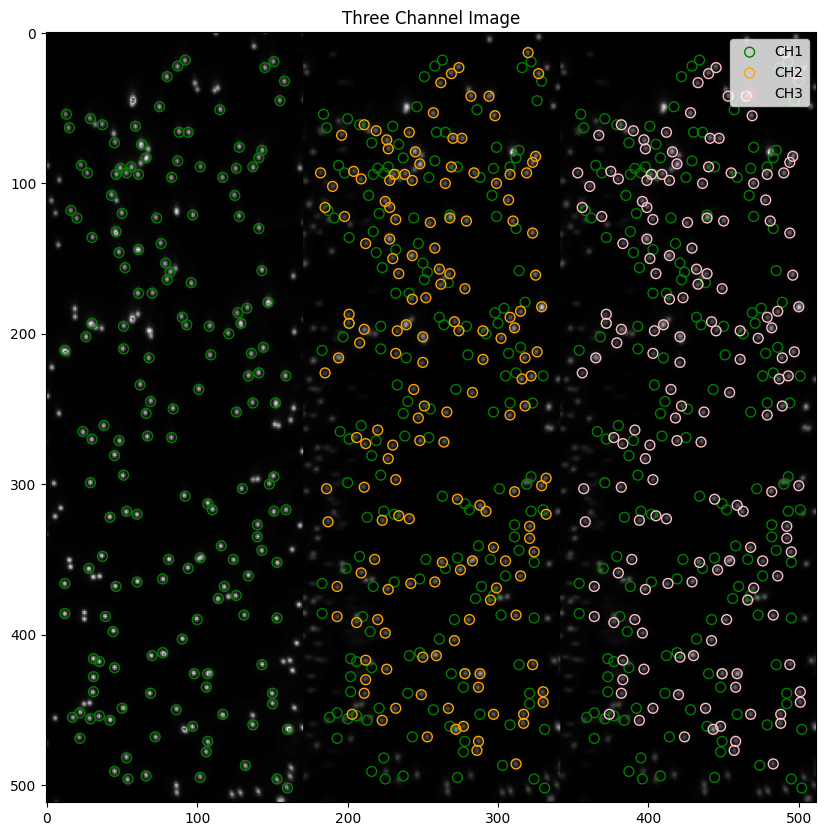

In [5]:
good_peaks_1_CH2 = shift_peaks(good_peaks_1, shift=[0, 171])
good_peaks_1_CH3 = shift_peaks(good_peaks_1, shift=[0, 342])
good_peaks_2_CH2 = shift_peaks(good_peaks_2, shift=[0, 171])
good_peaks_3_CH3 = shift_peaks(good_peaks_3, shift=[0, 342])

plt.figure(figsize=(10, 10))
plt.imshow(hel1_avg_image, cmap="gray")
plt.scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='g', label='CH1')
plt.scatter(good_peaks_1_CH2[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='g')
plt.scatter(good_peaks_1_CH3[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='g')
plt.scatter(good_peaks_2_CH2[:, 1], good_peaks_2[:, 0], s=50, facecolors='none', edgecolors='orange', label='CH2')
plt.scatter(good_peaks_3_CH3[:, 1], good_peaks_3[:, 0], s=50, facecolors='none', edgecolors='pink', label='CH3')
plt.legend(loc='upper right')
plt.title('Three Channel Image')
plt.show()

# Find Best Linear Mapping Shfit

In [6]:
shift_CH2 = [-1, -10]
shift_CH3 = [-1,-11]
tolerance=4
good_peaks_2_shift = shift_peaks(good_peaks_2, shift=shift_CH2)
good_peaks_3_shift = shift_peaks(good_peaks_3, shift=shift_CH3)

found_pairs_noshift_count_CH2, found_pairs_noshift_CH2,_ = find_pairs(good_peaks_1, good_peaks_2, tolerance=tolerance, Channel_count=1)
found_pairs_shift_count_CH2, found_pairs_shift_CH2,_= find_pairs(good_peaks_1, good_peaks_2_shift, tolerance=tolerance, Channel_count=1)
found_pairs_noshift_count_CH3, found_pairs_noshift_CH3,_ = find_pairs(good_peaks_1, good_peaks_3, tolerance=tolerance, Channel_count=1)
found_pairs_shift_count_CH3, found_pairs_shift_CH3,_= find_pairs(good_peaks_1, good_peaks_3_shift, tolerance=tolerance, Channel_count=1)

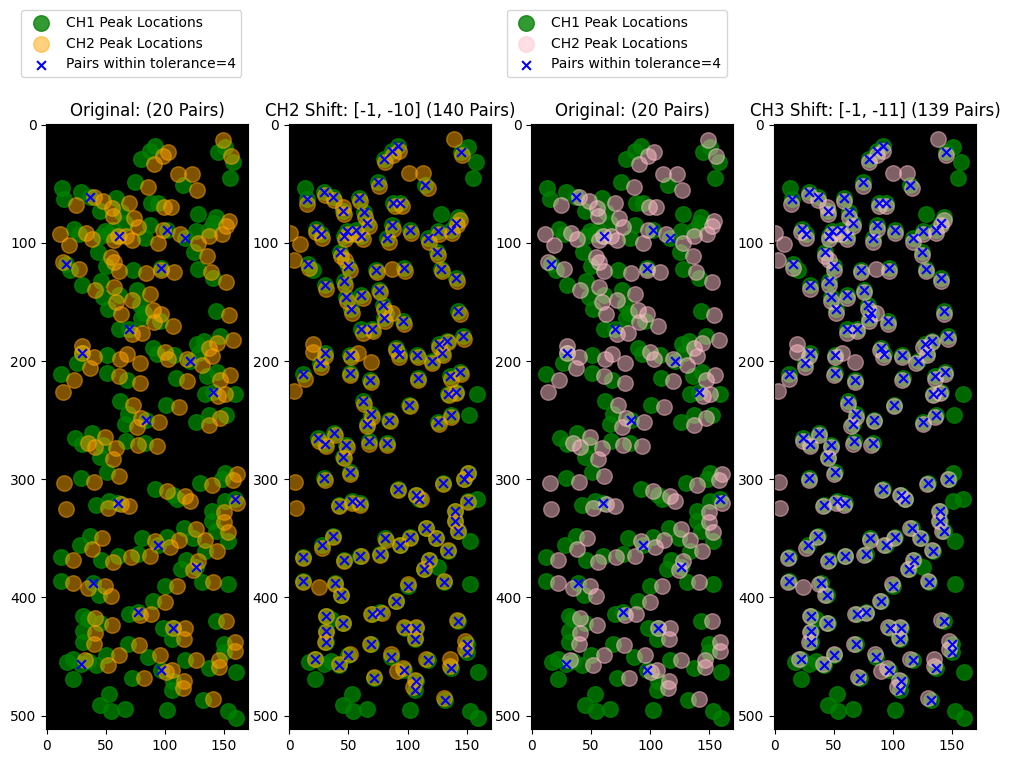

Number of pairs found without shift (CH2): 20
Number of pairs found with shift (CH2): 140
Number of pairs found without shift (CH3): 19
Number of pairs found with shift (CH3): 139


In [7]:

fig, axes = plt.subplots(1,4, figsize=(12, 16))
axes[0].imshow(np.zeros_like(avg_frame_data_CH1), cmap="gray")
axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=500, marker= ".", alpha=0.8, color='g', label='CH1 Peak Locations')
axes[0].scatter(good_peaks_2[:, 1], good_peaks_2[:, 0], s=500, marker=".", alpha=0.5, color='orange', label='CH2 Peak Locations')
axes[0].scatter(found_pairs_noshift_CH2[:,1], found_pairs_noshift_CH2[:,0], s=40, marker="x", color='b', label=f'Pairs within tolerance={tolerance}')
axes[0].set_title(f"Original: ({found_pairs_noshift_count_CH2} Pairs)")
axes[0].legend(loc='upper right', bbox_to_anchor=(1, 1.2))

axes[1].imshow(np.zeros_like(avg_frame_data_CH1), cmap="gray")
axes[1].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=500, marker= ".", alpha=0.8, color='g')
axes[1].scatter(good_peaks_2_shift[:, 1], good_peaks_2_shift[:, 0], s=500, marker=".", alpha=0.5, color='orange')
axes[1].scatter(found_pairs_shift_CH2[:,1], found_pairs_shift_CH2[:,0], s=40, marker="x", color='b')
axes[1].set_title(f"CH2 Shift: {shift_CH2} ({found_pairs_shift_count_CH2} Pairs)")

axes[2].imshow(np.zeros_like(avg_frame_data_CH1), cmap="gray")
axes[2].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=500, marker= ".", alpha=0.8, color='g', label='CH1 Peak Locations')
axes[2].scatter(good_peaks_2[:, 1], good_peaks_2[:, 0], s=500, marker=".", alpha=0.5, color='pink', label='CH2 Peak Locations')
axes[2].scatter(found_pairs_noshift_CH2[:,1], found_pairs_noshift_CH2[:,0], s=40, marker="x", color='b', label=f'Pairs within tolerance={tolerance}')
axes[2].set_title(f"Original: ({found_pairs_noshift_count_CH2} Pairs)")
axes[2].legend(loc='upper right', bbox_to_anchor=(1, 1.2))

axes[3].imshow(np.zeros_like(avg_frame_data_CH1), cmap="gray")
axes[3].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=500, marker= ".", alpha=0.8, color='g')
axes[3].scatter(good_peaks_3_shift[:, 1], good_peaks_3_shift[:, 0], s=500, marker=".", alpha=0.5, color='pink')
axes[3].scatter(found_pairs_shift_CH3[:,1], found_pairs_shift_CH3[:,0], s=40, marker="x", color='b')
axes[3].set_title(f"CH3 Shift: {shift_CH3} ({found_pairs_shift_count_CH3} Pairs)")


plt.show()

print(f"Number of pairs found without shift (CH2): {found_pairs_noshift_count_CH2}")
print(f"Number of pairs found with shift (CH2): {found_pairs_shift_count_CH2}")
print(f"Number of pairs found without shift (CH3): {found_pairs_noshift_count_CH3}")
print(f"Number of pairs found with shift (CH3): {found_pairs_shift_count_CH3}")

# Best Shifts:
#### CH2: [-1, -10]
#### CH3: [-1, -11]

# Manual Selection for Mapping!
#### CH1_Peak165 (y, x):(63,15), CH2_Peak125 (y, x):(67,186), CH3_Peak123 (y, x):(67,356)
#### CH1_Peak127 (y, x):(51,115), CH2_Peak37 (y, x):(54,288), CH3_Peak37 (y, x):(56,458)
#### CH1_Peak9 (y, x):(120,50), CH2_Peak19 (y, x):(123,222), CH3_Peak19 (y, x):(123, 392,371)
#### CH1_Peak145 (y, x):(108,125), CH2_Peak67 (y, x):(110,297), CH3_Peak66 (y, x):(110,467)
#### CH1_Peak97 (y, x):(210,51), CH2_Peak154 (y, x):(212,242), CH3_Peak152 (y, x):(212,392)
#### CH1_Peak74 (y, x):(228,134), CH2_Peak26 (y, x):(229,306), CH3_Peak26 (y, x):(229,476)
#### CH1_Peak18 (y, x):(322,42), CH2_Peak122 (y, x):(323,213), CH3_Peak120 (y, x):(323,383)
#### CH1_Peak59 (y, x):(327,140), CH2_Peak54 (y, x):(327,311), CH3_Peak53 (y, x):(327,481)
#### CH1_Peak15 (y, x):(422,45), CH2_Peak73 (y, x):(422,216), CH3_Peak72 (y, x):(422,386)
#### CH1_Peak30 (y, x):(420,143), CH2_Peak115 (y, x):(419,313), CH3_Peak113 (y, x):(419,483)

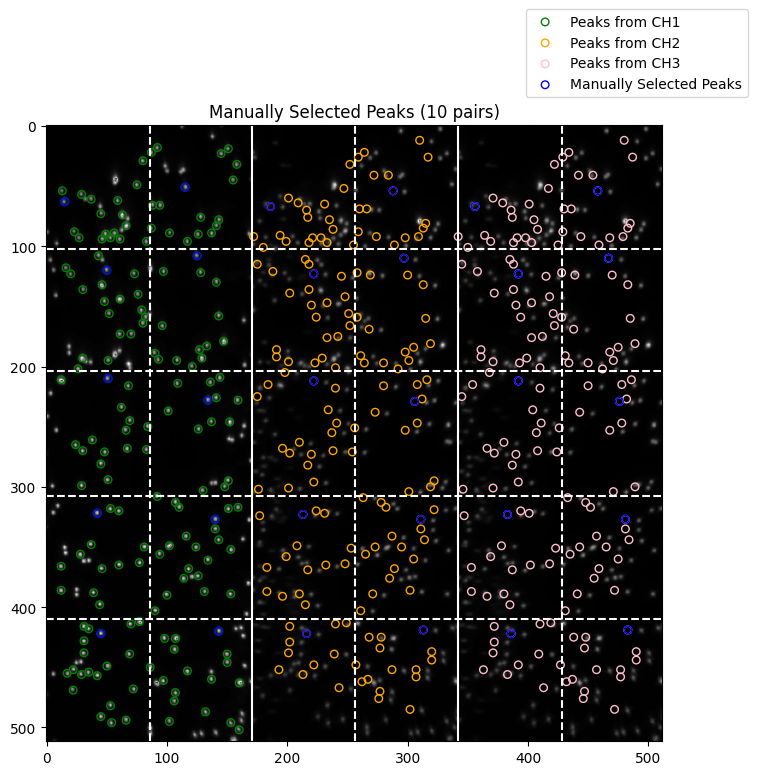

In [8]:
CH1_array = np.array([[63, 15], [51, 115], [120, 50], [108, 125], [210, 51], [228, 134], [322, 42], [327, 140], [422, 45], [420, 143]])
CH2_array = np.array([[67, 186], [54, 288], [123,222], [110, 297], [212, 222], [229, 306], [323, 213], [327,311], [422, 216], [419, 313]])
CH3_array = np.array([[67, 356], [54, 458], [123, 392], [110,467], [212, 392], [229, 476], [323, 383], [327,481], [422, 386], [419, 483]])

good_peaks_2_CH2_shift = shift_peaks(good_peaks_2_CH2, shift=[-1, -10])
good_peaks_3_CH3_shift = shift_peaks(good_peaks_3_CH3, shift=[-1, -11])

plt.figure(figsize=(8, 8))
plt.title("Manually Selected Peaks (10 pairs)")
plt.imshow(hel1_avg_image, cmap="gray")

plt.axhline(y= 102, color='w', linestyle='--')  
plt.axhline(y= 204, color='w', linestyle='--')
plt.axhline(y= 308, color='w', linestyle='--')
plt.axhline(y= 410, color='w', linestyle='--')

plt.axvline(x= 86, color='w', linestyle='--')
plt.axvline(x= 256, color='w', linestyle='--')
plt.axvline(x= 428, color='w', linestyle='--')

plt.axvline(x= 171, color='w', linestyle='-')
plt.axvline(x= 342, color='w', linestyle='-')

plt.scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=30, facecolors='none', edgecolors='g', label='Peaks from CH1')
plt.scatter(good_peaks_2_CH2_shift[:, 1], good_peaks_2_CH2_shift[:, 0], s=30, facecolors='none', edgecolors='orange', label='Peaks from CH2')
plt.scatter(good_peaks_3_CH3_shift[:, 1], good_peaks_3_CH3_shift[:, 0], s=30, facecolors='none', edgecolors='pink', label='Peaks from CH3')
plt.scatter(CH1_array[:, 1], CH1_array[:, 0], s=30, facecolors='none', edgecolors='b', label='Manually Selected Peaks')
plt.scatter(CH2_array[:, 1], CH2_array[:, 0], s=30, facecolors='none', edgecolors='b')
plt.scatter(CH3_array[:, 1], CH3_array[:, 0], s=30, facecolors='none', edgecolors='b')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.2))

plt.show()

# Applying PolyFit and Poly Map algos: how can we have continuity across all Channels?


In [9]:
def find_polyfit_params_3CH(peaks_1, peaks_2, peaks_3, degree=2):
    y1, x1 = peaks_1[:, 0], peaks_1[:, 1] 
    y2, x2 = peaks_2[:, 0], peaks_2[:, 1] 
    y3, x3 = peaks_3[:, 0], peaks_3[:, 1]

    # Fit polynomials for x and y separately
    params_x_12 = np.polyfit(x1, x2, degree)  # Fit x transformation
    params_y_12 = np.polyfit(y1, y2, degree)  # Fit y transformation
    params_x_13 = np.polyfit(x1, x3, degree)  # Fit x transformation
    params_y_13 = np.polyfit(y1, y3, degree)  # Fit y transformation


    return params_x_12, params_y_12, params_x_13, params_y_13 # Returns polynomial coefficients

In [10]:
params_x_CH12, params_y_CH12, params_x_CH13, params_y_CH13 = find_polyfit_params_3CH(CH1_array, CH2_array, CH3_array, degree=3)

print("X-Mapping Parameters (CH1->CH2):", params_x_CH12)
print("Y-Mapping Parameters (CH1->CH2):", params_y_CH12)
print("X-Mapping Parameters (CH2->CH3):", params_x_CH13)
print("Y-Mapping Parameters (CH2->CH3):", params_y_CH13)


X-Mapping Parameters (CH1->CH2): [-1.10197598e-05  2.12396105e-03  9.10756267e-01  1.71886973e+02]
Y-Mapping Parameters (CH1->CH2): [-1.48848316e-08  1.46924491e-05  9.85424900e-01  4.15094590e+00]
X-Mapping Parameters (CH2->CH3): [-1.10197598e-05  2.12396105e-03  9.10756267e-01  3.41886973e+02]
Y-Mapping Parameters (CH2->CH3): [-1.48848316e-08  1.46924491e-05  9.85424900e-01  4.15094590e+00]


In [11]:
# Shift poly_pair_arr_CH2 and poly_pair_arr_CH3 backt to original coordinates
